## Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print("Libraries imported")

Libraries imported


## Import Dataset

In [51]:
soh_dataset = pd.read_csv(r"../Data/soh_dataset.csv")
soc_charge_dataset = pd.read_csv(r"../Data/soc_charge_dataset.csv")
soc_discharge_dataset = pd.read_csv(r"../Data/soc_discharge_dataset.csv")
print("Datasets imported")

Datasets imported


## SoH (State of Health) Preprocessing

In [52]:
soh_dataset.head()

,battery_id,cycle,ambient_temperature,voltage_mean,voltage_std,voltage_min,voltage_max,current_mean,current_std,current_min,current_max,temperature_mean,temperature_std,current_charge_mean,voltage_charge_mean,duration,capacity,soh
0,B0005,1,24,3.529829,0.235957,2.612467,4.191492,-1.818702,0.593546,-2.018015,0.000729,32.572328,3.486920,-1.805570,2.404944,3690.234,1.856487,100.000000
1,B0005,3,24,3.537320,0.234765,2.587209,4.189773,-1.817560,0.595180,-2.016821,0.002927,32.725235,3.426734,-1.804583,2.399260,3672.344,1.846327,99.452721
2,B0005,5,24,3.543737,0.227525,2.651917,4.188187,-1.816487,0.596498,-2.016574,0.001484,32.642862,3.379475,-1.803575,2.397969,3651.641,1.835349,98.861386
3,B0005,7,24,3.543666,0.232744,2.592948,4.188461,-1.825589,0.583462,-2.015936,0.001547,32.514876,3.386544,-1.812863,2.408289,3631.563,1.835263,98.856718
4,B0005,9,24,3.542343,0.236689,2.547420,4.188299,-1.826114,0.583469,-2.017426,0.001701,32.382349,3.395881,-1.812876,2.408505,3629.172,1.834646,98.823482


In [53]:
soh_dataset.nunique()

battery_id               3
cycle                  259
ambient_temperature      1
voltage_mean           468
voltage_std            468
voltage_min            468
voltage_max            468
current_mean           468
current_std            468
current_min            468
current_max            468
temperature_mean       468
temperature_std        468
current_charge_mean    466
voltage_charge_mean    468
duration               299
capacity               468
soh                    466
dtype: int64

### Drop Unnecessary Columns

In [54]:
# battery_id dropped because its a name and not categorical value. 
# ambient_temperature dropped because only 1 unique value is not helpfull.
# cycle dropped because numerical index value is not necessary.
soh_dataset.drop(columns=['battery_id','ambient_temperature','cycle'], inplace=True)

### Handle Missing Values

In [55]:
soh_dataset.isnull().sum()

voltage_mean           0
voltage_std            0
voltage_min            0
voltage_max            0
current_mean           0
current_std            0
current_min            0
current_max            0
temperature_mean       0
temperature_std        0
current_charge_mean    0
voltage_charge_mean    0
duration               0
capacity               0
soh                    0
dtype: int64

Dataset has no missing values.

#### Dropna Method

In [56]:
# Copy the dataset
dfTest1 = soh_dataset.copy()

# Before we dropped NaN values
print("Before:",dfTest1.shape)

# Drop NaN values
dfTest1.dropna(inplace=True)

# After we dropped NaN values
print("After:",dfTest1.shape)

Before: (468, 15)
After: (468, 15)


#### Fillna Method

In [57]:
# Copy the dataset
dfTest2 = soh_dataset.copy()

# Fill NaN values only in numeric columns
numeric_cols = dfTest2.select_dtypes(include=['number']).columns
dfTest2[numeric_cols] = dfTest2[numeric_cols].fillna(dfTest2[numeric_cols].mean())

# Show after filled
dfTest2.isnull().sum()

voltage_mean           0
voltage_std            0
voltage_min            0
voltage_max            0
current_mean           0
current_std            0
current_min            0
current_max            0
temperature_mean       0
temperature_std        0
current_charge_mean    0
voltage_charge_mean    0
duration               0
capacity               0
soh                    0
dtype: int64

### Encoding Categorical Data

Dataset has no categorical data

In [58]:
# Copy the dataset
dfTest3 = soh_dataset.copy()

# Turn categories into seperate features
dfTest3 = pd.get_dummies(dfTest3)

# Show after removal of categorical data
dfTest3.head()

,voltage_mean,voltage_std,voltage_min,voltage_max,current_mean,current_std,current_min,current_max,temperature_mean,temperature_std,current_charge_mean,voltage_charge_mean,duration,capacity,soh
0,3.529829,0.235957,2.612467,4.191492,-1.818702,0.593546,-2.018015,0.000729,32.572328,3.486920,-1.805570,2.404944,3690.234,1.856487,100.000000
1,3.537320,0.234765,2.587209,4.189773,-1.817560,0.595180,-2.016821,0.002927,32.725235,3.426734,-1.804583,2.399260,3672.344,1.846327,99.452721
2,3.543737,0.227525,2.651917,4.188187,-1.816487,0.596498,-2.016574,0.001484,32.642862,3.379475,-1.803575,2.397969,3651.641,1.835349,98.861386
3,3.543666,0.232744,2.592948,4.188461,-1.825589,0.583462,-2.015936,0.001547,32.514876,3.386544,-1.812863,2.408289,3631.563,1.835263,98.856718
4,3.542343,0.236689,2.547420,4.188299,-1.826114,0.583469,-2.017426,0.001701,32.382349,3.395881,-1.812876,2.408505,3629.172,1.834646,98.823482


### Splitting the Dataset

In [59]:
# Seperate X and y values.
X = soh_dataset.drop(columns=['soh'])  # Features (all columns except 'soh')
y = soh_dataset['soh']    

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (374, 14)
X_test shape: (94, 14)
y_train shape: (374,)
y_test shape: (94,)


### Normalization

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,voltage_mean,voltage_std,voltage_min,voltage_max,current_mean,current_std,current_min,current_max,temperature_mean,temperature_std,current_charge_mean,voltage_charge_mean,duration,capacity
250,0.168005,0.438626,0.619302,0.388848,0.554533,0.760986,0.840916,0.264322,0.768103,0.795541,0.933794,0.419181,0.362773,0.362925
232,0.350902,0.555865,0.569817,0.511457,0.423376,0.658883,0.800030,0.264803,0.549503,0.468797,0.949511,0.568288,0.477596,0.489615
162,0.359551,0.352979,0.883961,0.589198,0.681543,0.847050,0.677872,0.290820,0.739418,0.946303,0.917975,0.264898,0.062475,0.160763
314,0.000000,0.680216,0.492778,0.362476,0.801857,0.909560,0.752132,0.288268,0.665064,0.851386,0.904273,0.158490,0.099682,0.109036
18,0.920765,0.458571,0.578266,0.485257,0.181937,0.405347,0.680219,0.338125,0.432216,0.214208,0.019978,0.831030,0.683390,0.743332


## SoH (State Of Health) Report

### HeatMap

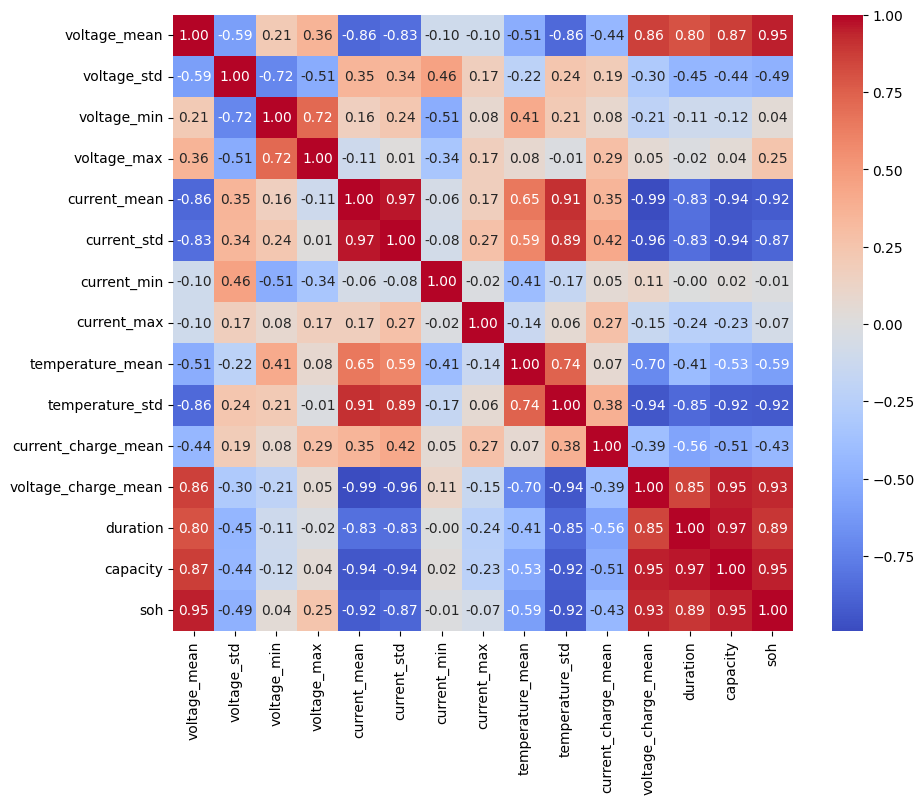

In [63]:
# Combine features and target for correlation matrix
X_train_with_y = X_train_scaled.copy()
X_train_with_y['soh'] = y_train  # Add the target column

# Compute correlation matrix
corr_matrix = X_train_with_y.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

### Scatterplots 

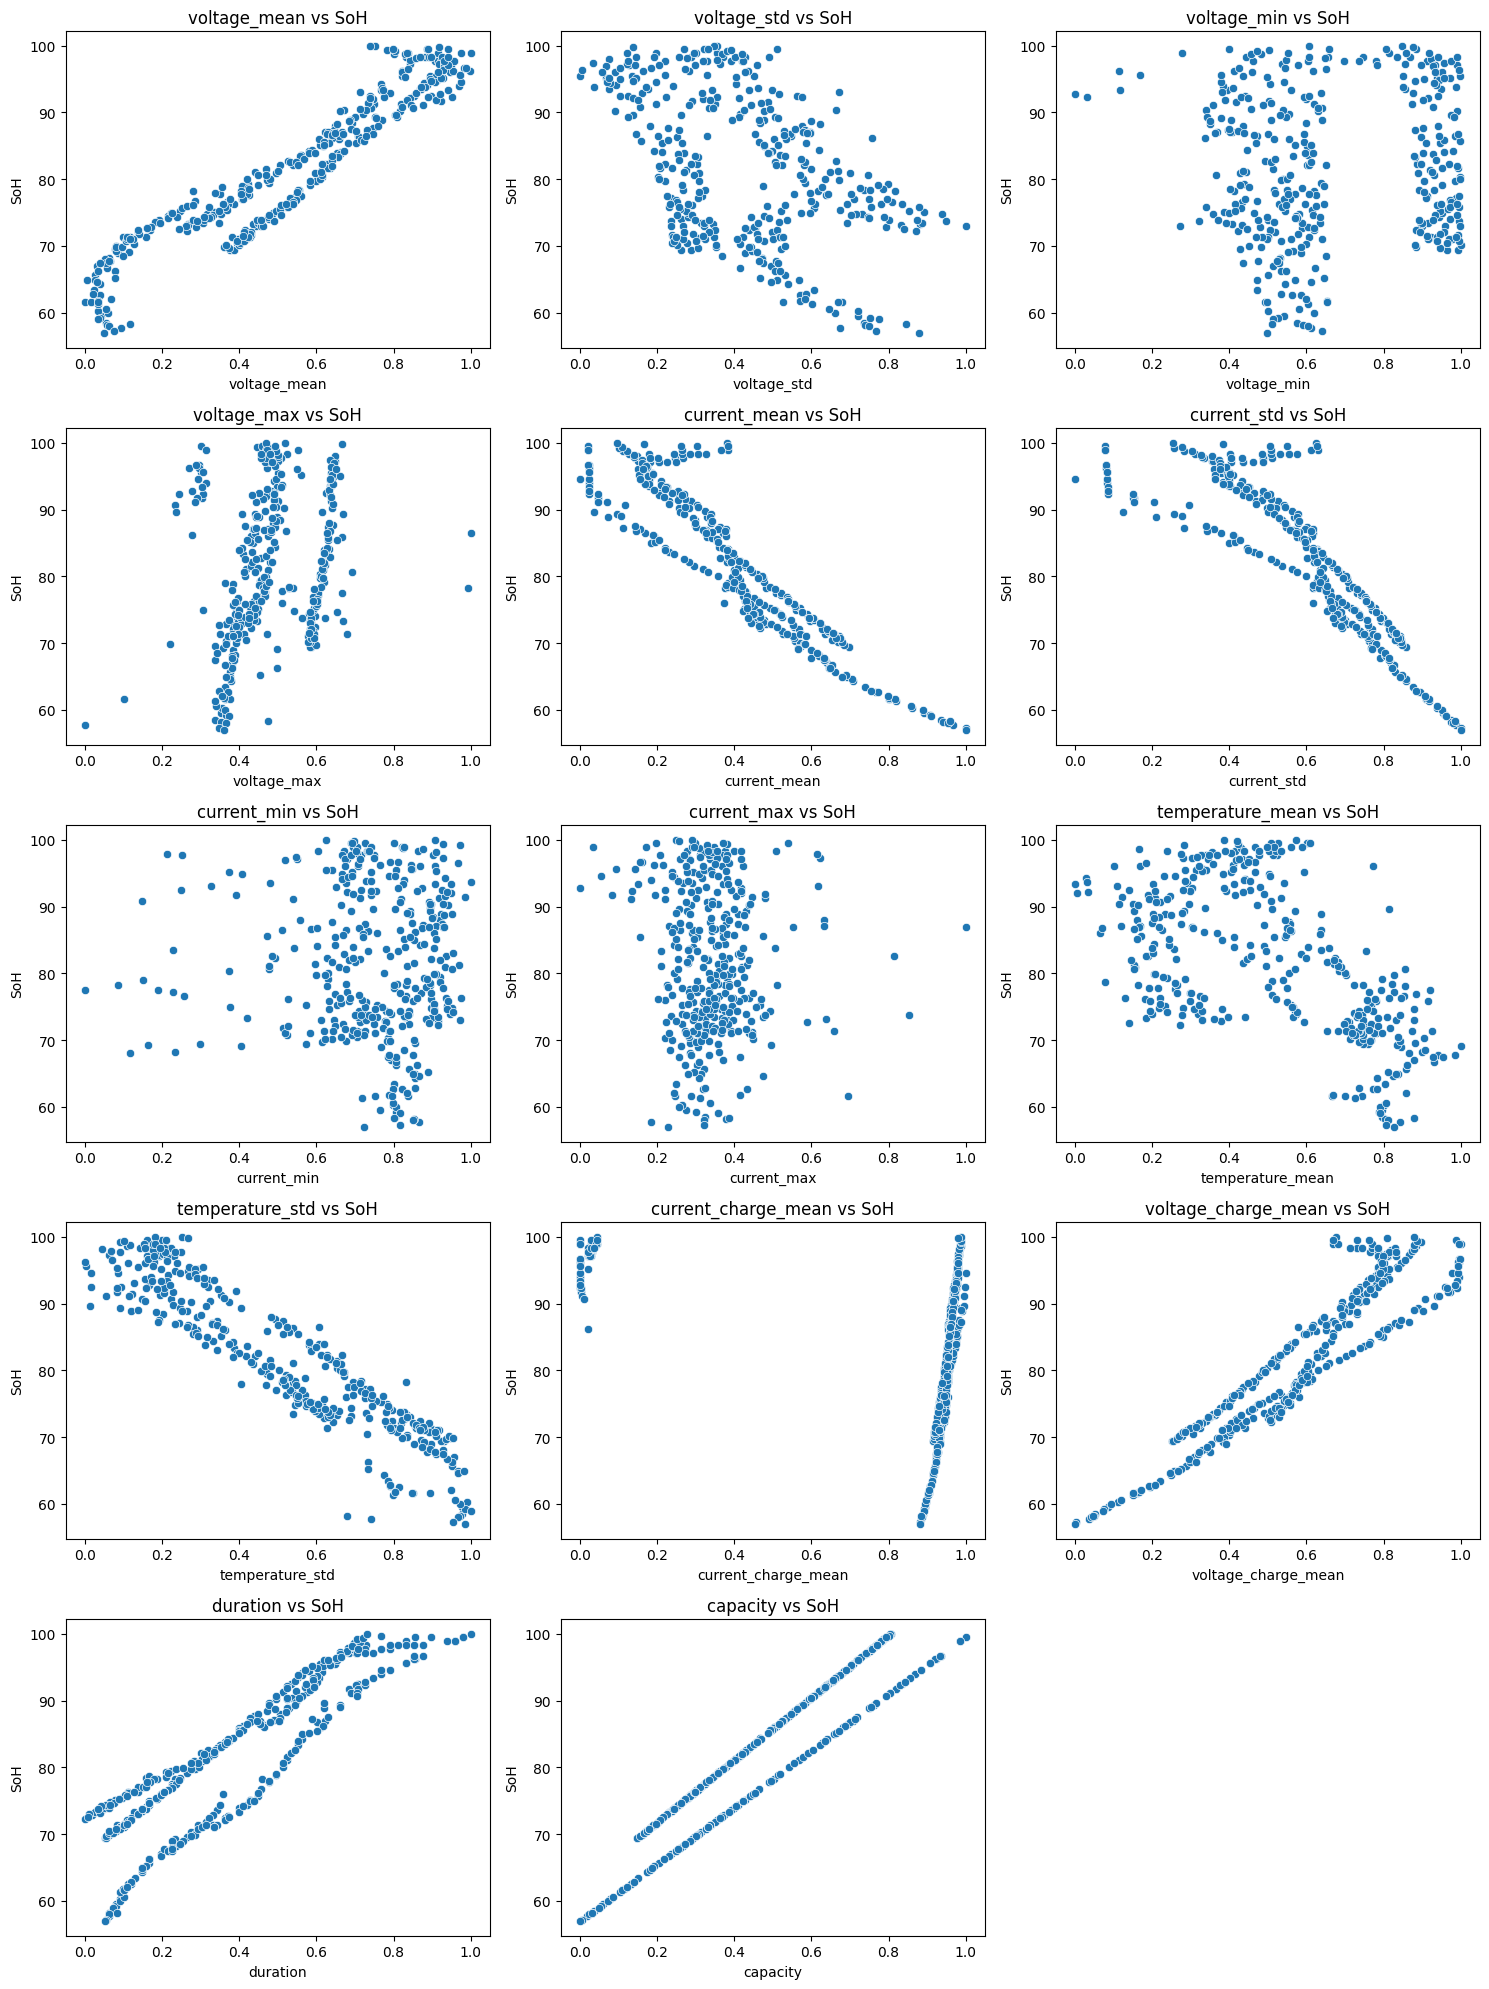

In [64]:
import math
features = X_train_scaled.columns.tolist()
n_features = len(features)

# Grid boyutlarını ayarla (örneğin: 3 sütun, otomatik satır sayısı)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Grid çizimi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # 2D array'i düzleştir

for i, feature in enumerate(features):
    sns.scatterplot(x=X_train_scaled[feature], y=y_train, ax=axes[i])
    axes[i].set_title(f'{feature} vs SoH')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SoH')

# Boş kalan alt grafik hücrelerini gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("soh_scatter.png")

## SoC (State of Charge) - Charge Preprocessing 

In [65]:
soc_charge_dataset.head()

,battery_id,cycle,ambient_temperature,time,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,soc
0,B0005,0,24,0.000,3.873017,-0.001201,24.655358,0.000,0.003,0.000000
1,B0005,0,24,2.532,3.479394,-4.030268,24.666480,-4.036,1.570,-0.368711
2,B0005,0,24,5.500,4.000588,1.512731,24.675394,1.500,4.726,-0.208081
3,B0005,0,24,8.344,4.012395,1.509063,24.693865,1.500,4.742,-0.054162
4,B0005,0,24,11.125,4.019708,1.511318,24.705069,1.500,4.753,0.096347


In [66]:
soc_charge_dataset.nunique()

battery_id                    3
cycle                       264
ambient_temperature           1
time                     582666
voltage_measured        1362154
current_measured        1362154
temperature_measured    1362154
current_charge             1603
voltage_charge              329
soc                     1315917
dtype: int64

In [67]:
negative_soc_count = soc_charge_dataset[soc_charge_dataset['soc'] < 0].shape[0]

# Print the result
print(f"Number of rows with SoC < 0: {negative_soc_count}")

Number of rows with SoC < 0: 1213


In [68]:
# Remove SoC < 0 because SoC charge can't be negative. 
soc_charge_dataset = soc_charge_dataset[soc_charge_dataset['soc'] >= 0]

In [69]:
negative_soc_count = soc_charge_dataset[soc_charge_dataset['soc'] < 0].shape[0]

# Print the result
print(f"Number of rows with SoC < 0: {negative_soc_count}")

Number of rows with SoC < 0: 0


### Drop Unnecessary Columns

In [70]:
# battery_id dropped because its a name and not categorical value. 
# ambient_temperature dropped because only 1 unique value is not helpfull.
# cycle dropped because numerical index value is not necessary.
soc_charge_dataset.drop(columns=['battery_id','ambient_temperature','cycle'], inplace=True)

### Handle Missing Values

In [71]:
soc_charge_dataset.isnull().sum()

time                    0
voltage_measured        2
current_measured        2
temperature_measured    2
current_charge          0
voltage_charge          0
soc                     0
dtype: int64

Dataset has missing values.

#### Dropna Method

In [74]:
# Before we dropped NaN values
print("Before:",soc_charge_dataset.shape)

# Drop NaN values
soc_charge_dataset.dropna(inplace=True)

# After we dropped NaN values
print("After:",soc_charge_dataset.shape)

Before: (1360941, 7)
After: (1360941, 7)


### Encoding Categorical Data

Dataset has no categorical data

In [75]:
# Copy the dataset
dfTest4 = soc_charge_dataset.copy()

# Turn categories into seperate features
dfTest4 = pd.get_dummies(dfTest4)

# Show after removal of categorical data
dfTest4.head()

,time,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,soc
0,0.000,3.873017,-0.001201,24.655358,0.000,0.003,0.000000
4,11.125,4.019708,1.511318,24.705069,1.500,4.753,0.096347
5,13.891,4.025409,1.512779,24.718140,1.498,4.758,0.245845
6,16.672,4.030636,1.511838,24.731144,1.500,4.764,0.396354
7,19.500,4.035349,1.510245,24.741290,1.500,4.769,0.549407


### Splitting the dataset

In [76]:
# Seperate X and y values.
X = soc_charge_dataset.drop(columns=['soc'])  # Features (all columns except 'soc')
y = soc_charge_dataset['soc']    

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1088752, 6)
X_test shape: (272189, 6)
y_train shape: (1088752,)
y_test shape: (272189,)


### Normalization

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,time,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge
507454,0.745765,0.501119,0.044183,0.139905,0.032472,0.848872
1335647,0.153668,0.492909,0.988462,0.473223,1.000000,0.971851
1096104,0.962773,0.500036,0.029842,0.104552,0.017230,0.843681
627223,0.852732,0.500200,0.047902,0.104323,0.037111,0.846876
469213,0.420791,0.501211,0.159434,0.245630,0.151756,0.866241


## SoC (State of Charge) - Charge Report

### HeatMap

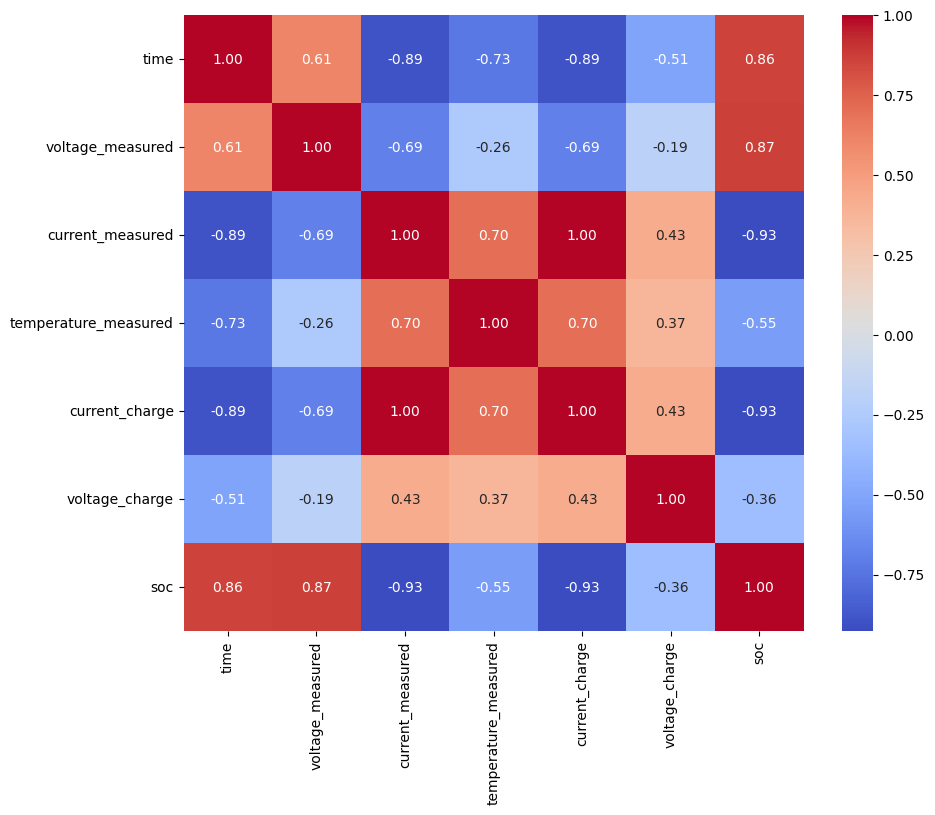

In [80]:
# Combine features and target for correlation matrix
X_train_with_y = X_train_scaled.copy()
X_train_with_y['soc'] = y_train  # Add the target column

# Compute correlation matrix
corr_matrix = X_train_with_y.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

### Scatterplots

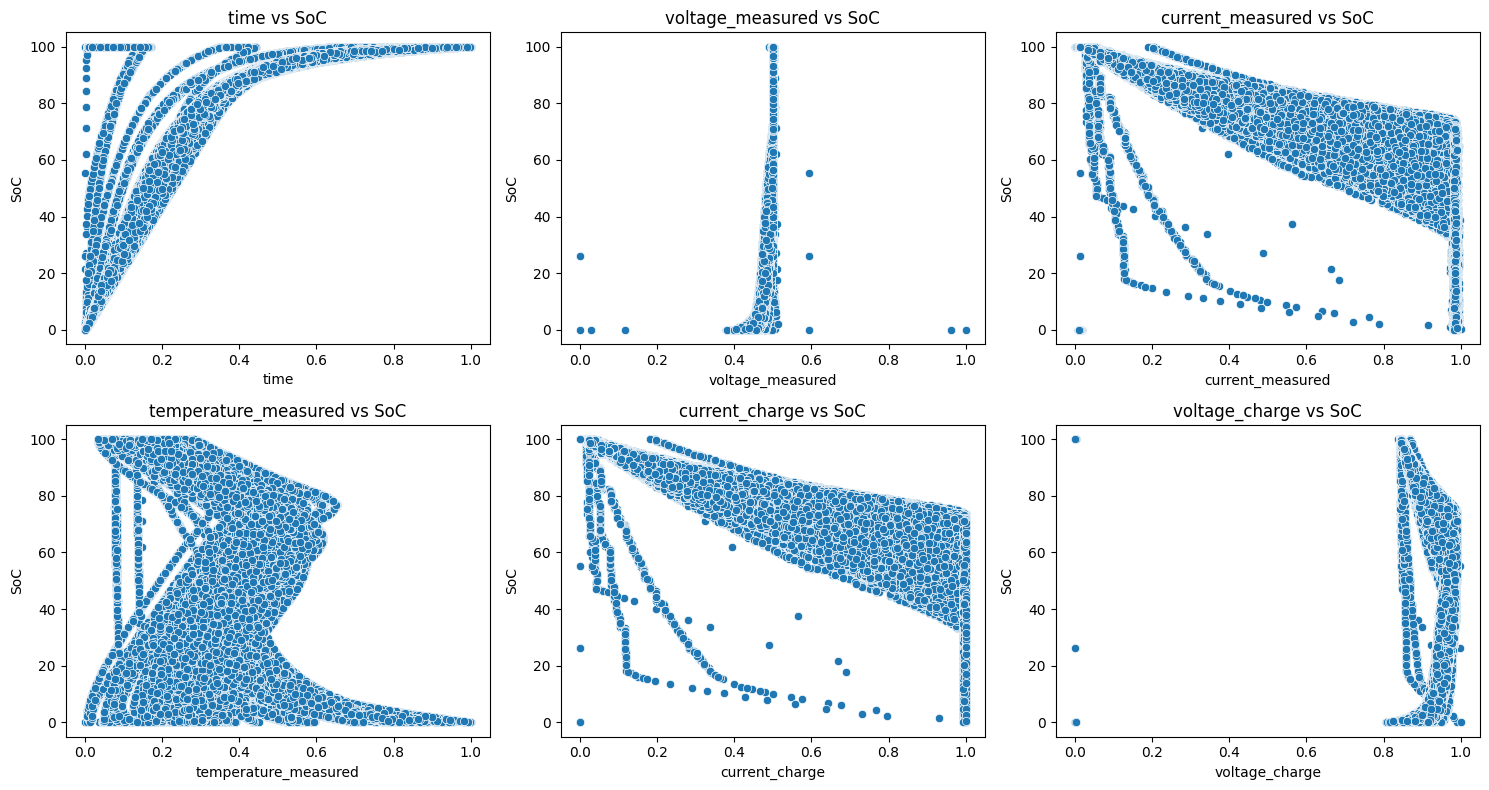

In [81]:
import math
features = X_train_scaled.columns.tolist()
n_features = len(features)

# Grid boyutlarını ayarla (örneğin: 3 sütun, otomatik satır sayısı)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Grid çizimi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # 2D array'i düzleştir

for i, feature in enumerate(features):
    sns.scatterplot(x=X_train_scaled[feature], y=y_train, ax=axes[i])
    axes[i].set_title(f'{feature} vs SoC')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SoC')

# Boş kalan alt grafik hücrelerini gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("soc_charge_scatter.png")

## Soc (State of Charge) - Discharge Preprocessing

In [33]:
soc_discharge_dataset.head()

,battery_id,cycle,instance,time,voltage,current,temperature,voltage_load,current_load,ambient_temperature,soc
0,B0005,1,0,0.000,4.191492,-0.004902,24.330034,0.000,-0.0006,24,100.000000
1,B0005,1,1,16.781,4.190749,-0.001478,24.325993,4.206,-0.0006,24,99.999629
2,B0005,1,2,35.703,3.974871,-2.012528,24.389085,3.062,-1.9982,24,99.429839
3,B0005,1,3,53.781,3.951717,-2.013979,24.544752,3.030,-1.9982,24,98.885072
4,B0005,1,4,71.922,3.934352,-2.011144,24.731385,3.011,-1.9982,24,98.339176


In [34]:
soc_discharge_dataset.nunique()

battery_id                  3
cycle                     259
instance                  371
time                    61903
voltage                135436
current                135436
temperature            135436
voltage_load             1605
current_load               19
ambient_temperature         1
soc                    134969
dtype: int64

In [35]:
negative_soc_count = soc_discharge_dataset[soc_discharge_dataset['soc'] < 0].shape[0]

# Print the result
print(f"Number of rows with SoC < 0: {negative_soc_count}")

Number of rows with SoC < 0: 14036


In [36]:
# Remove SoC < 0 because SoC charge can't be negative. 
soc_discharge_dataset = soc_discharge_dataset[soc_discharge_dataset['soc'] >= 0]

In [37]:
negative_soc_count = soc_discharge_dataset[soc_discharge_dataset['soc'] < 0].shape[0]

# Print the result
print(f"Number of rows with SoC < 0: {negative_soc_count}")

Number of rows with SoC < 0: 0


### Drop Unnecessary Columns

In [38]:
# battery_id dropped because its a name and not categorical value. 
# ambient_temperature dropped because only 1 unique value is not helpfull.
# cycle dropped because numerical index value is not necessary.
# instance dropped because its only used in creating the dataset. Its unnecessary.
soc_discharge_dataset.drop(columns=['battery_id','ambient_temperature','cycle','instance'], inplace=True)

### Handle Missing Values

In [39]:
soc_charge_dataset.isnull().sum()

time                    0
voltage_measured        0
current_measured        0
temperature_measured    0
current_charge          0
voltage_charge          0
soc                     0
dtype: int64

Dataset has no missing values

#### Dropna Method

In [40]:
dfTest5 = soc_discharge_dataset.copy()

# Before we dropped NaN values
print("Before:",dfTest5.shape)

# Drop NaN values
dfTest5.dropna(inplace=True)

# After we dropped NaN values
print("After:",dfTest5.shape)

Before: (121400, 7)
After: (121400, 7)


### Encoding Categorical Data

Dataset has no categorical data

In [41]:
# Copy the dataset
dfTest6 = soc_discharge_dataset.copy()

# Turn categories into seperate features
dfTest6 = pd.get_dummies(dfTest6)

# Show after removal of categorical data
dfTest6.head()

,time,voltage,current,temperature,voltage_load,current_load,soc
0,0.000,4.191492,-0.004902,24.330034,0.000,-0.0006,100.000000
1,16.781,4.190749,-0.001478,24.325993,4.206,-0.0006,99.999629
2,35.703,3.974871,-2.012528,24.389085,3.062,-1.9982,99.429839
3,53.781,3.951717,-2.013979,24.544752,3.030,-1.9982,98.885072
4,71.922,3.934352,-2.011144,24.731385,3.011,-1.9982,98.339176


### Splitting the Dataset

In [42]:
# Seperate X and y values.
X = soc_discharge_dataset.drop(columns=['soc'])  # Features (all columns except 'soc')
y = soc_discharge_dataset['soc']    

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (97120, 6)
X_test shape: (24280, 6)
y_train shape: (97120,)
y_test shape: (24280,)


### Normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,time,voltage,current,temperature,voltage_load,current_load
3082,0.139352,0.715670,0.008292,0.323534,0.671307,0.00025
82371,0.431619,0.424319,0.008492,0.657751,0.574799,1.00000
129610,0.144725,0.633728,0.009452,0.301121,0.649127,0.99985
51014,0.715409,0.505888,0.008670,0.625432,0.607834,0.00005
109395,0.429504,0.552395,0.010364,0.467152,0.621992,0.99990


## Soc (State of Charge) - Discharge Report

### HeatMap

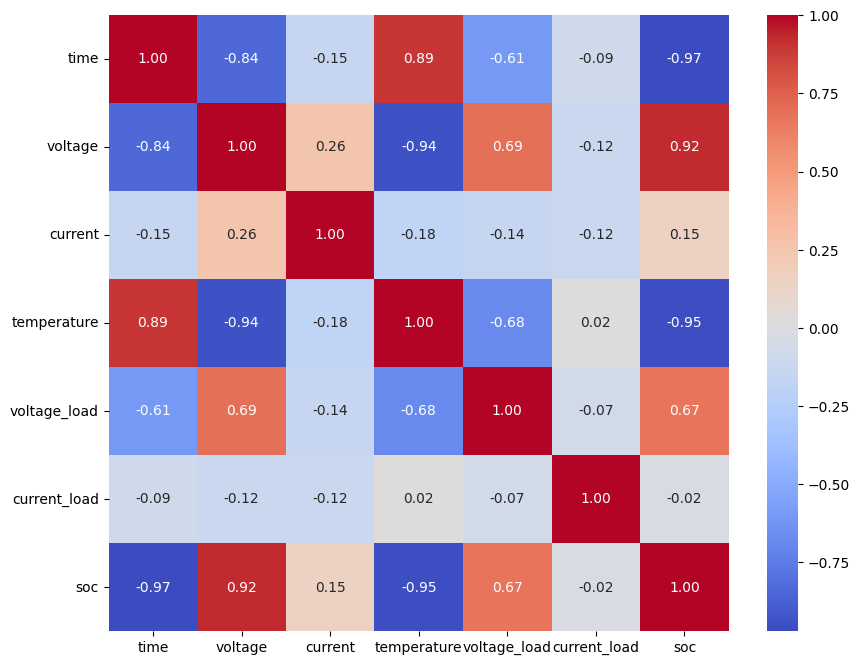

In [46]:
# Combine features and target for correlation matrix
X_train_with_y = X_train_scaled.copy()
X_train_with_y['soc'] = y_train  # Add the target column

# Compute correlation matrix
corr_matrix = X_train_with_y.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

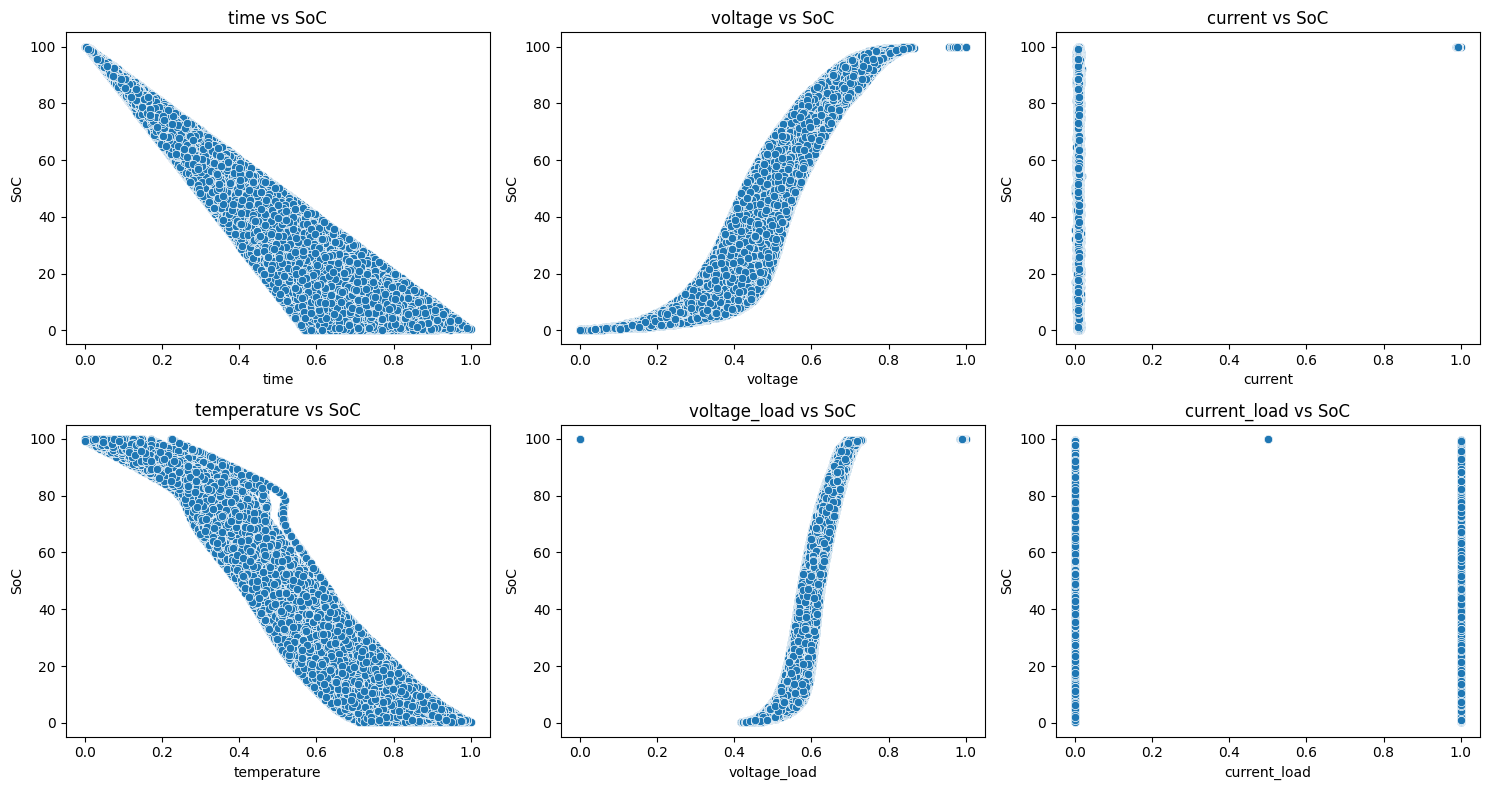

In [49]:
import math
features = X_train_scaled.columns.tolist()
n_features = len(features)

# Grid boyutlarını ayarla (örneğin: 3 sütun, otomatik satır sayısı)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Grid çizimi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # 2D array'i düzleştir

for i, feature in enumerate(features):
    sns.scatterplot(x=X_train_scaled[feature], y=y_train, ax=axes[i])
    axes[i].set_title(f'{feature} vs SoC')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SoC')

# Boş kalan alt grafik hücrelerini gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("soc_discharge_scatter.png")